In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [66]:
data = pd.read_csv('./Heart Attack.csv')
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [67]:
data.describe()


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [68]:
data.isnull().sum()


age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [69]:
# Split the data into features and target
X = data.drop('class', axis=1)
y = data['class']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))


1055
264


In [71]:
# Create a decision tree classifier
# 1. criterion function to measure the quality of a split
# 2. The strategy used to choose the split at each node.
# 3. The maximum depth of the tree.
# clf = DecisionTreeClassifier(criterion='entropy',splitter="random",max_depth=5)
clf = DecisionTreeClassifier()


In [72]:
# Train the decision tree model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:

# Visualize the decision tree
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Heart_attack_decision_tree.png")

True

In [74]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [75]:
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


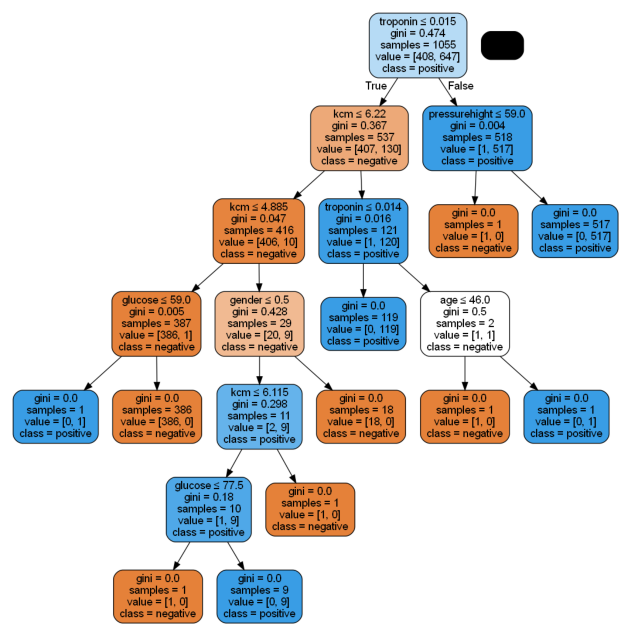

In [76]:
# Show the decision tree visualization (can be found in the current directory)
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("./Heart_attack_decision_tree.png"))
plt.axis('off')
plt.show()

In [77]:
# Import necessary libraries
# with use of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Create and train a Random Forest classifier
# 1. n_estimators means number of tree in forest 
# 2. criterion to measure the quality of a splits
# rf_clf = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Make predictions using Random Forest
rf_y_pred = rf_clf.predict(X_test)

In [80]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [81]:
#using adaBoost

from sklearn.ensemble import AdaBoostClassifier


In [82]:
ab_clf = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=42)

ab_clf.fit(X_train, y_train)

c:\Users\Kuldip\anaconda3\envs\bia\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, random_state=42)

In [83]:
ab_y_pred = rf_clf.predict(X_test)


In [84]:
# Evaluate Random Forest model
ab_accuracy = metrics.accuracy_score(y_test, ab_y_pred)
ab_precision = metrics.precision_score(y_test, ab_y_pred, average='weighted')
ab_recall = metrics.recall_score(y_test, ab_y_pred, average='weighted')
ab_f1_score = metrics.f1_score(y_test, ab_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
